## Datasets preprocessing

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Dataset 1

In [2]:
# Import txt file
df1 = pd.read_csv('A1-turbine.txt', sep="\t", decimal=".")

# Separate features (x1) and target variable (y1)
x1, y1 = df1.drop(["power"], axis=1), df1[["power"]]

# Scale the features and target variable to the range [0, 1]
scaler = MinMaxScaler()
x1 = scaler.fit_transform(x1)
y1 = scaler.fit_transform(y1)
y1 = y1 * 0.8 + 0.1  # Transform y1 to the desired range [0.1, 0.9]

# Split the data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.15, random_state=42)

### Dataset 2

In [3]:
# Import txt file
df2 = pd.read_csv('A1-synthetic.txt', sep="\t", decimal=".")

# Rename the column '#v1' to 'v1'
df2.rename(columns={'#v1': 'v1'}, inplace=True)

# Separate features (x2) and target variable (y2)
x2, y2 = df2.drop(["z"], axis=1), df2[["z"]]

# Scale the features and target variable to the range [0, 1]
x2 = scaler.fit_transform(x2)
y2 = scaler.fit_transform(y2)
y2 = y2 * 0.8 + 0.1  # Transform y2 to the desired range [0.1, 0.9]

# Split the data into training and testing sets
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

### Dataset 3

In [6]:
# Read data from CSV file
df3 = pd.read_csv('data.csv', sep=",", decimal=".")

# Calculate z-scores for the 'price' column and filter out values with z-scores greater than 0.8 for data normalization
from scipy.stats import zscore
z_scores = zscore(df3["price"])
abs_z_scores = np.abs(z_scores)
df3 = df3[(abs_z_scores < 0.8)]

# Drop redundant columns from the DataFrame
df3 = df3.drop(["date", "waterfront", "view", "yr_built", "yr_renovated", "street", "statezip", "country"], axis=1)

# Check for missing values in the DataFrame (There are no missing values)
missing_values = df3.isnull().sum()

# Perform one-hot encoding for the 'city' column to get rid of categorical data
df3 = pd.get_dummies(df3, columns=['city'])
# Convert boolean values to integers (1 for True, 0 for False)
df3 = df3.astype(int)

# Separate features (x3) and target variable (y3)
x3, y3 = df3.drop(["price"], axis=1), df3[["price"]]

# Scale the features and target variable to the range [0, 1]
scaler = MinMaxScaler()
x3 = scaler.fit_transform(x3)
y3 = scaler.fit_transform(y3)
y3 = y3 * 0.8 + 0.1  # Transform y3 to the desired range [0.1, 0.9]

# Split the data into training and testing sets
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=42)

df3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,city_Algona,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000,3,1,1340,7912,1,3,1340,0,0,...,0,0,1,0,0,0,0,0,0,0
2,342000,3,2,1930,11947,1,4,1930,0,0,...,0,0,0,0,0,0,0,0,0,0
3,420000,3,2,2000,8030,1,4,1000,1000,0,...,0,0,0,0,0,0,0,0,0,0
4,550000,4,2,1940,10500,1,4,1140,800,0,...,0,0,0,0,0,0,0,0,0,0
5,490000,2,1,880,6380,1,3,880,0,0,...,0,1,0,0,0,0,0,0,0,0


Training - epoch:  0 Error:  16.807756360199868
Validation - epoch:  0 Error:  4.59205965850424
Training - epoch:  1 Error:  7.045517595783176
Validation - epoch:  1 Error:  2.0340405403564152
Training - epoch:  2 Error:  4.909654363373103
Validation - epoch:  2 Error:  1.4539304817128291
Training - epoch:  3 Error:  4.56775718015085
Validation - epoch:  3 Error:  1.353744586187394
Training - epoch:  4 Error:  4.509832546239079
Validation - epoch:  4 Error:  1.333999446307331
Training - epoch:  5 Error:  4.492151933799344
Validation - epoch:  5 Error:  1.3275250545812167
Training - epoch:  6 Error:  4.478025349028776
Validation - epoch:  6 Error:  1.3231680114882696
Training - epoch:  7 Error:  4.4630073828706465
Validation - epoch:  7 Error:  1.3190887607771205
Training - epoch:  8 Error:  4.447179254333143
Validation - epoch:  8 Error:  1.31501503647133
Training - epoch:  9 Error:  4.430938568257435
Validation - epoch:  9 Error:  1.310923372063368
Training - epoch:  10 Error:  4.4145

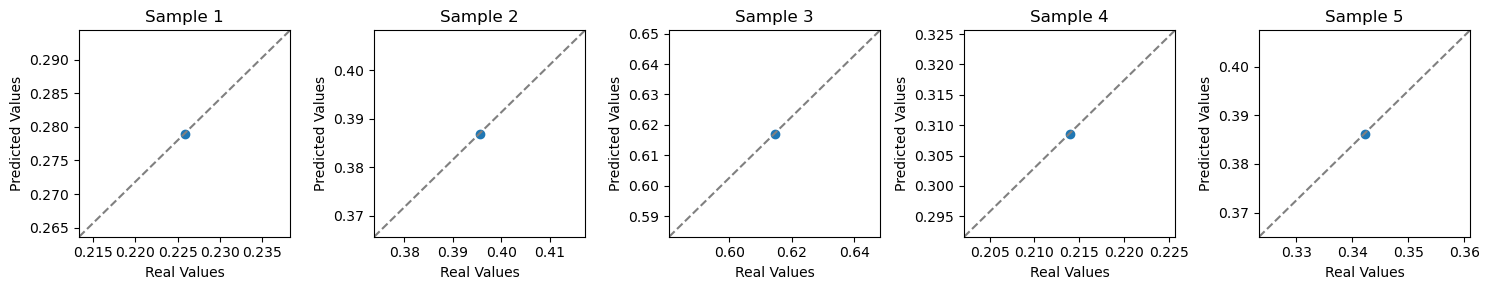

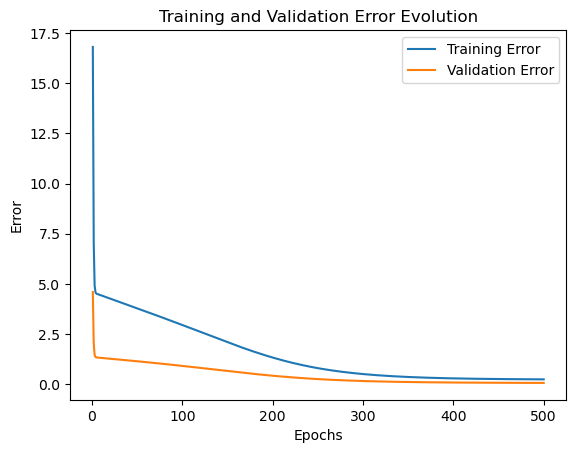

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product
from sklearn.metrics import mean_absolute_percentage_error

# Your Neural Network and ActivationFunctions classes here...

from MyNeuralNetwork import MyNeuralNetwork

# Import txt file
df1 = pd.read_csv('A1-turbine.txt', sep="\t", decimal=".")

# Separate features (x1) and target variable (y1)
x1, y1 = df1.drop(["power"], axis=1), df1[["power"]]

# Scale the features and target variable to the range [0, 1]
scaler = MinMaxScaler()
x1 = scaler.fit_transform(x1)
y1 = scaler.fit_transform(y1)
y1 = y1 * 0.8 + 0.1  # Transform y1 to the desired range [0.1, 0.9]

# Split the data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.15, random_state=42)

# Define hyperparameter combinations to try
layer_structures = [(4, 8, 1)]
epochs_values = [500]
learning_rates = [0.01]
momentum_values = [0.1]
activation_functions = ["sigmoid"]

# Initialize variables to store results
min_mape = float('inf')
best_params = None
all_results = []

# Iterate over hyperparameter combinations
for structure, epochs, lr, momentum, activation in product(layer_structures, epochs_values, learning_rates, momentum_values, activation_functions):
    # Ensure the last layer has only one neuron
    structure = list(structure[:-1]) + [1]

    # Initialize and train the neural network
    nn = MyNeuralNetwork(layers=structure, epochs=epochs, lr=lr, momentum=momentum, fact=activation)
    nn.fit(x1_train, y1_train)

    # Evaluate on the test set
    predictions = nn.predict(x1_test)
    predictions = predictions * 0.8 + 0.1  # Denormalize predictions
    mape = mean_absolute_percentage_error(y1_test, predictions)

    # Record results
    all_results.append({
        'Structure': structure,
        'Epochs': epochs,
        'Learning Rate': lr,
        'Momentum': momentum,
        'Activation': activation,
        'MAPE': mape
    })

    # Check if current model has the minimum MAPE
    if mape < min_mape:
        min_mape = mape
        best_params = {
            'Structure': structure,
            'Epochs': epochs,
            'Learning Rate': lr,
            'Momentum': momentum,
            'Activation': activation
        }

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Plot prediction vs. real values for a few rows
sample_indices = np.random.choice(len(y1_test), size=5, replace=False)
fig, axs = plt.subplots(1, 5, figsize=(15, 3))

for i, idx in enumerate(sample_indices):
    axs[i].scatter(y1_test[idx], predictions[idx])
    axs[i].plot([0, 1], [0, 1], '--', transform=axs[i].transAxes, color='gray')  # Diagonal line for reference
    axs[i].set_title(f"Sample {i+1}")
    axs[i].set_xlabel("Real Values")
    axs[i].set_ylabel("Predicted Values")

plt.tight_layout()
plt.show()


# Plot the evolution of training and validation errors
error_train, error_val = nn.loss_epochs()
epochs_range = range(1, len(error_train) + 1)

plt.plot(epochs_range, error_train, label='Training Error')
plt.plot(epochs_range, error_val, label='Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training and Validation Error Evolution')
plt.legend()
plt.show()
